# Characterize dynamics of Landsat time series components
<font color=gray>This script decomposes the time series into a set of components (trend, remainder, and seasonality) and characterizes each of these components</font>

## 1. Import libraries

In [1]:
library(bfast)
library(forecast)
#install.packages('gdata')
#library(gdata)


Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


## 2. Inputs

In [2]:
ifolder <-'C:\\Users\\keers001\\Data\\RETURN\\20191019_SimulationOptSAR\\Landsat\\SampledData\\'
ofolder <-'C:\\Users\\keers001\\Data\\RETURN\\20191019_SimulationOptSAR\\Landsat\\Char\\'
nfolder <- 'C:\\Users\\keers001\\Dropbox\\output\\Jupyter_notebook\\'
basename <- 'LSTS_RndmSample_NoFire_5_Tree_80_scl_30_npnt_20000_VI'
nyr <- 18 # number of years in observation period
nobsYr <- 365 # number of observations per year

## 3. Import data
<font color=gray>Import the dataframe with time series that need to be characterized. The dataframe needs to be structured as follows:
 - Each row represents a pixel
 - The first two columns contain the coordinates of the pixel
 - The remaining columns equal observations at a particular date. The dates must have regular intervals.</font>

In [3]:
system(paste0('jupyter-nbconvert.exe ', nfolder, 'sim_Functions.ipynb  --to script'))#, intern=FALSE
source(file.path(nfolder, 'sim_Functions.r'))

ifileVI <- paste0(basename, '.rda')
dfVi <- loadRData(file = file.path(ifolder, ifileVI))
#head(dfVi)

[1] 0

## 4. Decompose time series using BFAST01
<font color=gray>Decomposition of time series into seasonality, trend and remainder

 - Seasonality: modeled as a harmonic function
 - Trend: linear trend without break
 - Remainder: residuals, calculated as time series - trend - seasonality
</font>


In [4]:
tmp <- decompTSbfast(dfVi, nyr, nobsYr)
#print(tmp)
# sesonality (fitted harmonic function)
dataVISeasbf <-  tmp[[1]]
# remainder
dataVIRembf <- tmp[[2]]
# trend (linear trend without break)
dataVITrbf <- tmp[[3]]
# coefficients of fitted harmonic functions 
dataVISeasCoef <- tmp[[4]]



## 5. Characterize each of the components

In [5]:
# ------------------------------------------------
# general

# fraction missing values
tsVIMissVal <- rowSums(is.na(dfVi))/dim(dfVi)[2]

# ------------------------------------------------
# seasonality

# half of the seasonal amplitude for each pixel
seasVImax <- apply(dataVISeasbf[,-c(1,2)], 1, max) 
#average seasonal pattern
seasS <- dataVISeasbf[dataVISeasbf[,1]<0,]# only southern hemisphere to avoid interference of seasonal cycles
seasVImean <- colMeans(as.matrix(seasS[,-c(1,2)]))

# ------------------------------------------------
# offset 
TrVImean <- mean(rowMeans(as.matrix(dataVITrbf[,-c(1,2)])), na.rm=T)

# ------------------------------------------------
# remainder

# SD of remainder per pixel
Rem_VIsd <- apply(dataVIRembf[,-c(1,2)], 1, sd, na.rm=T)
# ARMA model - characterization of the remainder dynamics per pixel
Rem_VIcoef <- list()
for(i in 1:dim(dataVIRembf)[1]){
  Rem_VIcoef[[i]] <- getARMAcoef(ts(as.numeric(dataVIRembf[i,-c(1,2)]), frequency=nobsYr))
}


## 6. Export

In [6]:
# Components
save(dataVISeasbf, file = file.path(ofolder, paste0(tools::file_path_sans_ext(ifileVI), '_Seasbf.rda')))
save(dataVIRembf, file = file.path(ofolder, paste0(tools::file_path_sans_ext(ifileVI), '_Rembf.rda')))
save(dataVITrbf, file = file.path(ofolder, paste0(tools::file_path_sans_ext(ifileVI), '_Trbf.rda')))
save(dataVISeasCoef, file = file.path(ofolder, paste0(tools::file_path_sans_ext(ifileVI), '_SeasCoefbf.rda')))

# characteristics components
save(seasVImax, file = file.path(ofolder, paste0(tools::file_path_sans_ext(ifileVI), '_seasVImax.rda')))
save(seasVImean, file = file.path(ofolder, paste0(tools::file_path_sans_ext(ifileVI), '_seasVImean.rda')))

save(TrVImean, file = file.path(ofolder, paste0(tools::file_path_sans_ext(ifileVI), '_TrVImean.rda')))

save(Rem_VIsd, file = file.path(ofolder, paste0(tools::file_path_sans_ext(ifileVI), '_Rem_VIsd.rda')))

save(Rem_VIcoef, file = file.path(ofolder, paste0(tools::file_path_sans_ext(ifileVI), '_Rem_VIcoef.rda')))
save(tsVIMissVal, file = file.path(ofolder, paste0(tools::file_path_sans_ext(ifileVI), '_ts_VIMissVal.rda')))


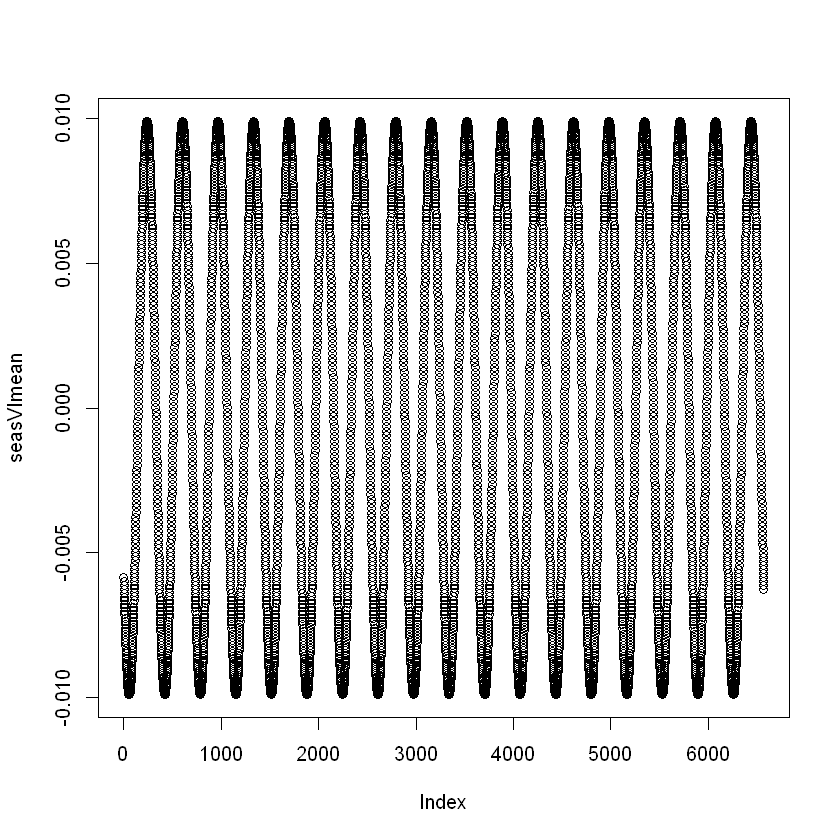